import significa “traer una herramienta externa al programa”.
numpy (abreviado como np) es una librería (un conjunto de herramientas) que permite trabajar con matemática avanzada, especialmente arreglos y matrices.

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.neighbors import LocalOutlierFactor

“sklearn” (scikit-learn) es una librería de inteligencia artificial y machine learning.
Dentro de ella está el módulo “neighbors”.
Dentro de “neighbors” está la clase LocalOutlierFactor, que es un algoritmo que sirve para detectar puntos raros, también llamados outliers.
¿Qué es un outlier?
Un dato que “se sale del grupo”, que está lejos de los demás. Por ejemplo, si todos pesan 70–80 kilos y alguien pesa 200, es un outlier.

In [4]:
np.random.seed(42)

Configura el generador de números aleatorios para que siempre produzca los mismos valores.
Porque si tu programa genera puntos al azar, no podrás repetir exactamente los mismos resultados cada vez que lo ejecutes.
Con seed(42) aseguramos:
siempre salen los mismos datos aleatorios

el ejemplo es reproducible

el gráfico no cambia cada vez

In [5]:
# Generamos los datos de entrenamiento

El símbolo # inicia un comentario, es decir: una nota para el humano, no para la computadora.
Aquí el comentario # Generamos los datos de entrenamiento No se ejecuta. Solo explica qué se hará en las siguientes líneas de codigo

In [6]:
X_inliers = 0.3 * np.random.randn(100, 2)

np.random.randn(100,2) Es un generador de números aleatorios que siguen una distribución normal (también llamada campana de Gauss).
genera 100 filas
cada una de las filas con 2 números
los números siguen una distribución normal con media 0 y desviación estándar 1
¿Por qué hacemos 0.3 * ...? Porque queremos que los puntos estén más juntos y centrados.
Multiplicar los valores aleatorios por 0.3:
reduce su tamaño

hace que el grupo de puntos sea más compacto

evita que se dispersen demasiado en el gráfico
Antes una fila: [-1.2 0.7] Después de multiplicar x 0.3: [-0.36 0.21]. Mucho más cerca del origen.
¿Qué significa X_inliers = ...? Estamos guardando los resultados en una variable llamada X_inliers.
El nombre viene de:
inlier → punto normal, punto dentro del grupo

lo contrario de outlier, que es un punto raro o externo
X_inliers es un grupo de 100 puntos normales, cada uno con 2 coordenadas (x, y).
Estos serán los datos “buenos” o “normales” del dataset.

In [7]:
#VER LA MATRIZ
print(X_inliers)

[[ 0.14901425 -0.04147929]
 [ 0.19430656  0.45690896]
 [-0.07024601 -0.07024109]
 [ 0.47376384  0.23023042]
 [-0.14084232  0.16276801]
 [-0.13902531 -0.13971893]
 [ 0.07258868 -0.57398407]
 [-0.51747535 -0.16868626]
 [-0.30384934  0.0942742 ]
 [-0.27240722 -0.42369111]
 [ 0.43969463 -0.06773289]
 [ 0.02025846 -0.42742446]
 [-0.16331482  0.03327678]
 [-0.34529807  0.11270941]
 [-0.18019161 -0.08750812]
 [-0.18051198  0.55568346]
 [-0.00404917 -0.31731328]
 [ 0.24676347 -0.36625309]
 [ 0.06265908 -0.58790104]
 [-0.39845581  0.05905837]
 [ 0.22153997  0.05141048]
 [-0.03469448 -0.09033111]
 [-0.4435566  -0.21595326]
 [-0.13819163  0.31713667]
 [ 0.10308549 -0.52891205]
 [ 0.09722519 -0.11552468]
 [-0.2030766   0.18350289]
 [ 0.30929986  0.27938404]
 [-0.25176526 -0.09276371]
 [ 0.09937903  0.29266354]
 [-0.14375227 -0.05569769]
 [-0.33190049 -0.35886199]
 [ 0.24375775  0.40687201]
 [-0.02160304  0.30105987]
 [ 0.10849081 -0.19353593]
 [ 0.10841868  0.46141097]
 [-0.01074781  0.4693931 ]
 

In [8]:
#VER LAS DIMENSIONES DE LA MATRIZ
X_inliers.shape

(100, 2)

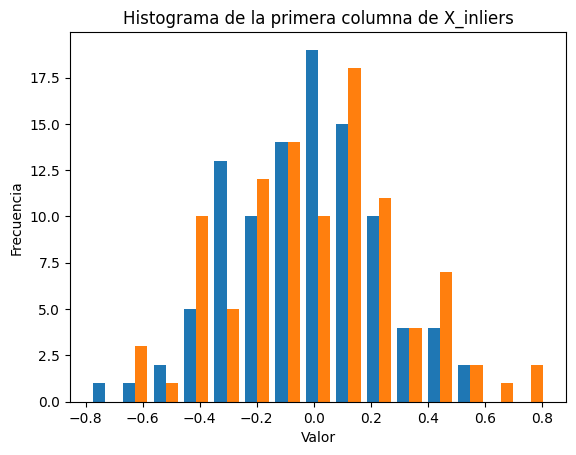

In [9]:
plt.hist(X_inliers[0:, :], bins=15)
plt.title("Histograma de la primera columna de X_inliers")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

np.random.randn(100,2) Es un generador de números aleatorios que siguen una distribución normal (también llamada campana de Gauss). genera 100 filas cada una de las filas con 2 números los números siguen una distribución normal con media 0 y desviación estándar 1 ¿Por qué hacemos 0.3 * ...? Porque queremos que los puntos estén más juntos y centrados. Multiplicar los valores aleatorios por 0.3: reduce su tamaño

hace que el grupo de puntos sea más compacto

evita que se dispersen demasiado en el gráfico Antes una fila: [-1.2 0.7] Después de multiplicar x 0.3: [-0.36 0.21]. Mucho más cerca del origen. ¿Qué significa X_inliers = ...? Estamos guardando los resultados en una variable llamada X_inliers. El nombre viene de: inlier → punto normal, punto dentro del grupo

lo contrario de outlier, que es un punto raro o externo X_inliers es un grupo de 100 puntos normales, cada uno con 2 coordenadas (x, y). Estos serán los datos “buenos” o “normales” del dataset.

[[ 2.14901425  1.95852071]
 [ 2.19430656  2.45690896]
 [ 1.92975399  1.92975891]
 [ 2.47376384  2.23023042]
 [ 1.85915768  2.16276801]
 [ 1.86097469  1.86028107]
 [ 2.07258868  1.42601593]
 [ 1.48252465  1.83131374]
 [ 1.69615066  2.0942742 ]
 [ 1.72759278  1.57630889]
 [ 2.43969463  1.93226711]
 [ 2.02025846  1.57257554]
 [ 1.83668518  2.03327678]
 [ 1.65470193  2.11270941]
 [ 1.81980839  1.91249188]
 [ 1.81948802  2.55568346]
 [ 1.99595083  1.68268672]
 [ 2.24676347  1.63374691]
 [ 2.06265908  1.41209896]
 [ 1.60154419  2.05905837]
 [ 2.22153997  2.05141048]
 [ 1.96530552  1.90966889]
 [ 1.5564434   1.78404674]
 [ 1.86180837  2.31713667]
 [ 2.10308549  1.47108795]
 [ 2.09722519  1.88447532]
 [ 1.7969234   2.18350289]
 [ 2.30929986  2.27938404]
 [ 1.74823474  1.90723629]
 [ 2.09937903  2.29266354]
 [ 1.85624773  1.94430231]
 [ 1.66809951  1.64113801]
 [ 2.24375775  2.40687201]
 [ 1.97839696  2.30105987]
 [ 2.10849081  1.80646407]
 [ 2.10841868  2.46141097]
 [ 1.98925219  2.4693931 ]
 

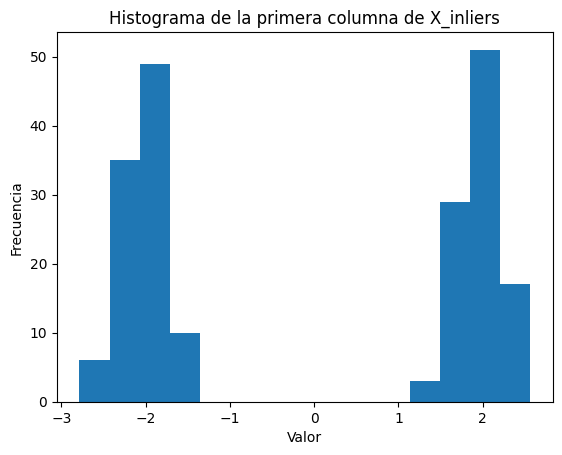

In [10]:
X_inliers2 = np.r_[X_inliers + 2, X_inliers - 2]
print(X_inliers2)

plt.hist(X_inliers2[:, 0], bins=15)
plt.title("Histograma de la primera columna de X_inliers")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

In [11]:
X_inliers2.shape

(200, 2)

Qué es X_inliers + 2?
A cada punto del arreglo, súmale 2 a las dos coordenadas:
Si un punto era: [-0.36, 0.21]. Entonces [-0.36 + 2, 0.21 + 2] = [1.64, 2.21]
PREGUNTA AL CURSO: ¿Qué es X_inliers - 2?
RESPUESTA: ¿Qué es X_inliers - 2? [-0.36, 0.21] → [-2.36, -1.79]
¿Qué hace np.r_[ ... , ... ]?
Es una función que une dos conjuntos de datos verticalmente.
Así: [ grupo desplazado +2 ] [ grupo desplazado -2 ] Resultado: una sola matriz con 200 filas.
¿Por qué hacemos esto?
Generamos dos grupos de puntos “buenos”:
uno centrado alrededor de (2,2)
otro centrado alrededor de (-2,-2)
Estos dos grupos representarán datos normales.

[[ 3.01898458  1.92614894]
 [ 1.57612593  1.61987267]
 [-1.12407079 -1.65126525]
 [ 2.47488924  2.48090716]
 [ 2.93657855  3.30592442]
 [ 0.09073919  0.01213036]
 [ 2.38636143  1.19971145]
 [ 1.61573502  2.36634136]
 [ 3.12004273 -1.29603875]
 [-0.99533638 -3.24814448]
 [ 0.62624113 -3.71246181]
 [-0.27521585  0.34115708]
 [-1.70766998  0.72666608]
 [-3.755998   -3.70121449]
 [ 2.58080449 -1.11847487]
 [-2.9835159   0.17794608]
 [ 2.15994842 -2.27343178]
 [ 0.98312381 -3.31722028]
 [-3.58654623  0.25083705]
 [ 0.32508097  1.09943921]]


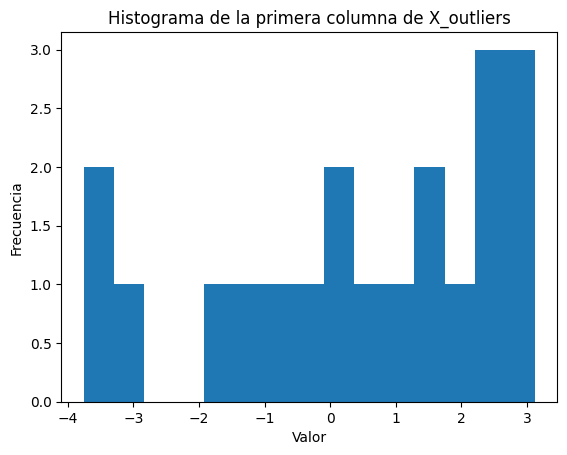

In [12]:
# Generamos algunos outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

print(X_outliers)

plt.hist(X_outliers[:, 0], bins=15)
plt.title("Histograma de la primera columna de X_outliers")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

¿Qué es np.random.uniform()?
Es un generador de números aleatorios que elige valores entre dos límites:
low=-4 significa el valor mínimo posible es −4
high=4 significa el valor máximo posible es 4
Es como decir:
“Elige números entre −4 y 4”.
¿Qué significa size=(20, 2)?
Vamos a generar 20 puntos, donde cada punto tiene 2 coordenadas (x, y)
Entonces crea una matriz así:
[ [valor, valor], [valor, valor], ... 20 veces ]
¿Por qué estos son outliers?
Porque estos puntos pueden caer en cualquier parte del cuadrado: x entre −4 y 4 y entre −4 y 4
Esto incluye puntos:
Lejos de los grupos normales

Totalmente dispersos

Con ubicaciones aleatorias
Son perfectos para representar “valores raros”.

In [13]:
X = np.r_[X_inliers2, X_outliers]

In [14]:
n_outliers = len(X_outliers)

In [15]:
print(n_outliers)

20


In [16]:
ground_truth = np.ones(len(X), dtype=int)
print(ground_truth)
ground_truth.shape

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


(220,)

len(X) → cuenta todos los puntos (inliers + outliers).
200 inliers
20 outliers
total = 220
np.ones(...) → crea un arreglo lleno de unos. [1, 1, 1, 1, 1, 1, ...]
dtype=int → asegura que sean números enteros.
POR QUÉ LO HACEMOS?
Estamos creando un arreglo que dice:
1 = punto normal (inlier)
−1 = punto raro (outlier)
Por ahora marcamos todos como normales, pero en la siguiente línea corregiremos eso.

In [17]:
ground_truth[-n_outliers:] = -1

print(ground_truth)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


ground_truth es una lista de 1s: [1, 1, 1, 1, ... 1]
-n_outliers: significa: “las últimas n_outliers posiciones”, o sea, los últimos 20 elementos
Si hay 220 datos: tomamos los elementos 200 al 219 y les ponemos −1

In [18]:
# Aquí vamos a entrenar el modelo para detectar puntos raros
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

print(clf)

LocalOutlierFactor(contamination=0.1)


¿Qué es LocalOutlierFactor?
Es un algoritmo que permite detectar puntos anormales analizando:
-qué tan cerca están de sus vecinos -qué tan denso es su “vecindario” -si están aislados o lejos del grupo principal
Es como observar: “Si un punto está solo, o alejado del grupo, probablemente es raro”.
¿Qué significa n_neighbors=20?
Este parámetro le dice al modelo: “Para decidir si un punto es raro, compáralo con sus 20 vecinos más cercanos”. Si un punto: está mucho más lejos de esos 20 vecinos o tiene un vecindario poco denso entonces LOF lo marcará como outlier.
¿Qué significa contamination=0.1?
Este parámetro indica: “Aproximadamente el 10% de los datos se espera que sean outliers”. Como tenemos: 200 puntos normales 20 puntos raros total = 220
20/220 = 0.09 → ~10%
El valor 0.1 es una buena aproximación.
OJO: Si no se especifica, LOF intenta estimarlo automáticamente, pero aquí lo indicamos manualmente.

In [19]:
#Usaremos fit_predict para obtener las etiquetas (normal u outlier).
#LOF no permite predecir sobre datos nuevos cuando se usa como detector de outliers.
#LOF estudia densidades locales del conjunto completo
#Si le damos un nuevo punto, no sabe dónde encajarlo
#Para eso existe un modo especial llamado novelty=True (pero aquí no lo usaremos)
y_pred = clf.fit_predict(X)

In [20]:
print(y_pred)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


Secuencia de código

In [21]:
n_errors = (y_pred != ground_truth).sum()

La línea de código cuentas las veces que el modelo estuvo errado
y_pred != ground_truth, compara los elementos de las 2 listas
Si la predicción es igual a la respuesta real → da False
Si la predicción es diferente → da True (error)
.sum() suma el número de errores

In [22]:
X_scores = clf.negative_outlier_factor_

X_scores, es una variable que guarda los puntajes de anomalia asigandos por el modelo en el conjunto de datos
clf.negative_outlier_factor_, es un valor que calcula el modelo para atribuir que tan lejos esta el punto del comportamineto normal o que tan anómalo es

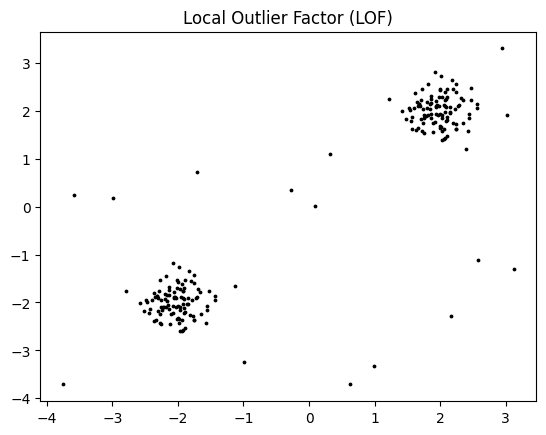

In [23]:
plt.title("Local Outlier Factor (LOF)")
sc_points = plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Puntos de datos')
sc_points

plt.title("Local Outlier Factor (LOF)"), coloca el título al gráfico
plt.scatter(X[:, 0], X[:, 1] crea un gráfico de dispersión (scatter plot)
X[:, 0] valores de la primera columna de tus datos (eje X)
X[:, 1] valores de la segunda columna de tus datos (eje Y)
color='k' → color de puntos, negro (k significa black)
s=3. → tamaño de puntos
label='Puntos de datos' etiqueta que describe los puntos
sc_points, guarda el gráfico de dispersión

In [24]:
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

radius, Es el raido o tamaño del punto basado en el ountaje del X_scores
X_scores.max() - X_scores
Resta cada puntaje del máximo. Esto invierte la escala, de manera que los puntos más anómalos (más negativos) ahora tengan valores más grandes.
X_scores.max() - X_scores.min()
Calcula la diferencia total entre el puntaje más grande y el más pequeño, es decir, el rango de los puntajes.


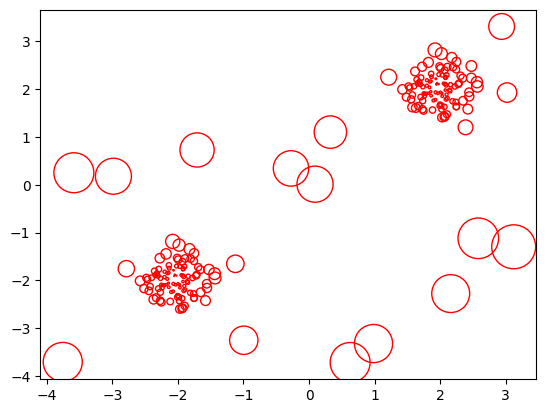

In [25]:
sc_circles = plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
sc_circles

El código dibuja circulos alrededor de los puntos.
plt.scatter
Crea un gráfico de dispersión utilizando como coordeandas x e y
X[:, 0] → valores de la primera columna (eje X)
X[:, 1] → valores de la segunda columna (eje Y)
s=1000 * radius, s indica el tamaño de los puntos.
Se multiplica el radius por 1000 para que los círculos sean visibles, los puntos más anómalos se ven más grandes.
edgecolors='r'pinta el borde del círculo en rojo (r = red).
facecolors='none', formato de circulos sin relleno
label='Outlier scores', Etiqueta que identifica los círculos en la leyenda del gráfico.
sc_circles
Guarda el objeto del scatter plot

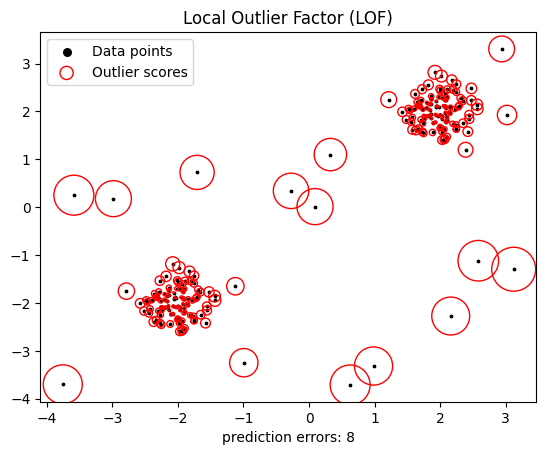

In [26]:
#plt.title("Local Outlier Factor (LOF)"), Título del gráfico
#Se dibujan los puntos originales y se guardan en sc_points
#label='Data points', nombre de la leyenda, Data points
plt.title("Local Outlier Factor (LOF)")
sc_points = plt.scatter(
    X[:, 0], X[:, 1],
    color='k',
    s=3,
    label='Data points'
)


#radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min()), calcula el valor del radio para determianr el tamaño del círculo
#plt.scatter(X[:, 0], X[:, 1]
#Dibuja los puntos en un gráfico usando las columnas 0 y 1.
#s=1000 * radius, los puntos más anómalos se dibujan más grandes.
#edgecolors='red', borde del círculo rojo.
#facecolors='none', interior del círculo es transparente, así se ven los puntos originales debajo.
#label='Outlier scores', etiqueta de leyenda del gráfico.

radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
sc_circles = plt.scatter(
    X[:, 0], X[:, 1],
    s=1000 * radius,
    edgecolors='red',
    facecolors='none',
    label='Outlier scores'
)


#plt.autoscale(), Ajusta automáticamente los límites del gráfico para visualizar todos los puntos
#plt.xlabel(f"prediction errors: {n_errors}"), coloca una etiqueta en el eje X del gráfico, muestra el número de errores en el eje x
plt.autoscale()
plt.xlabel(f"prediction errors: {n_errors}")

#plt.legend, Crea una leyenda en el gráfico para identificar los diferentes tipos de puntos
#handles=[sc_points, sc_circles], indica qué objetos del gráfico aparecer en la leyenda:
#sc_points, puntos normales en negro
#sc_circles, outliers en círculo rojo
#labels=['Data points', 'Outlier scores'], nombres en la leyenda
#loc='upper left', posición de la leyenda en la esquina superior izquierda del gráfico
#El resultado se guarda en leg para poder realizar cambios después

leg = plt.legend(handles=[sc_points, sc_circles],
                 labels=['Data points', 'Outlier scores'],
                 loc='upper left')


#tamaño del punto en la leyenda para Data points, 30
leg.legend_handles[0].set_sizes([30])

#tamaño del punto en la leyenda para Outlier scores, 90
leg.legend_handles[1].set_sizes([90])

# Se muestra el gráfico final con todos los elementos:
#Puntos normales
#Círculos rojos de outliers
#Leyenda con tamaños correctos

plt.show()